In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [2]:
pretest = pd.read_csv('/content/pretest.csv')

<ipython-input-2-0ba55190c0fd>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  pretest = pd.read_csv('/content/pretest.csv')


In [3]:
#Display the first five rows
pretest.head()

,visitor_id,date,email,experiment,group,submitted
0,1,2021-12-01,NaN,NaN,NaN,0
1,2,2021-12-01,NaN,NaN,NaN,0
2,3,2021-12-01,NaN,NaN,NaN,0
3,4,2021-12-01,NaN,NaN,NaN,0
4,5,2021-12-01,NaN,NaN,NaN,0


In [7]:
#showing some stats about the preset_dataset.

#How many rows are in the table?

#What is the date range of the date field in the table?

print('# of rows:',pretest.shape[0])
print('Date Range:', pretest.date.min(), '-', pretest.date.max())

# of rows: 309903
Date Range: 2021-12-01 - 2021-12-31


In [10]:
#check missing values.
pretest.isnull().sum()/ len(pretest) * 100

,0
visitor_id,0.000000
date,0.000000
email,89.901679
experiment,90.306967
group,90.306967
submitted,0.000000


In [15]:
#Let's get some data about the performance of pretest

# A. How many visitors were there?

# B. How many signups were there?

# C. What was the signup rate?

print('Total visitors count', pretest.visitor_id.count())
print('Total signup count', pretest.submitted.sum())
print('Total signup rate', pretest.submitted.mean().round(2))

Total visitors count 309903
Total signup count 31295
Total signup rate 0.1


#Plot Visitors Per day

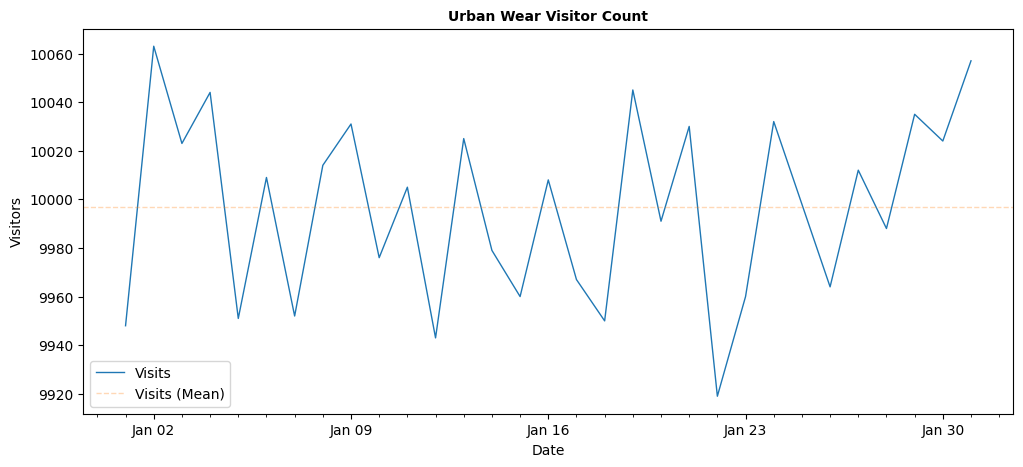

In [18]:
# Set the color palette for the plot
colors = sns.color_palette()
c1, c2 = colors[0], colors[1]

# Example: Replace `df` with your dataset variable
# Assuming `df` has columns 'date' and 'submitted'

# Count sign-ups by date
visits_per_day = pretest.groupby('date')['submitted'].count()
visits_mean = visits_per_day.mean()

# Plot data
plt.figure(figsize=(12, 5))
plt.plot(visits_per_day.index, visits_per_day, color=c1, linewidth=1, label='Visits')
plt.axhline(visits_mean, color=c2, linestyle='--', linewidth=1, alpha=0.3, label='Visits (Mean)')

# Format plot
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))  # Adjust interval as needed
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.xaxis.set_minor_locator(mdates.DayLocator())

plt.title('Urban Wear Visitor Count', fontsize=10, weight='bold')
plt.ylabel('Visitors', fontsize=10)
plt.xlabel('Date', fontsize=10)
plt.legend()

plt.show()

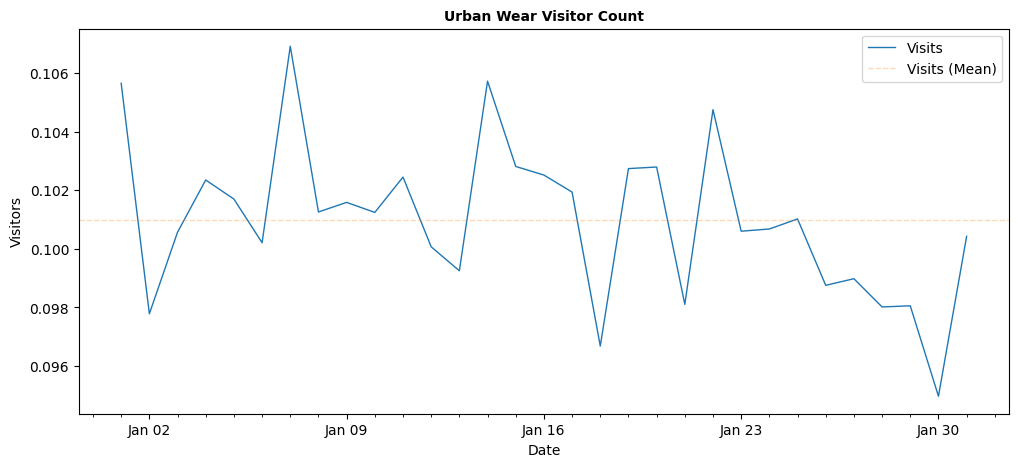

In [19]:
# Set the color palette for the plot
colors = sns.color_palette()
c1, c2 = colors[0], colors[1]

# Example: Replace `df` with your dataset variable
# Assuming `df` has columns 'date' and 'submitted'

# Count sign-ups by date
visits_per_day = pretest.groupby('date')['submitted'].mean()
visits_mean = visits_per_day.mean()

# Plot data
plt.figure(figsize=(12, 5))
plt.plot(visits_per_day.index, visits_per_day, color=c1, linewidth=1, label='Visits')
plt.axhline(visits_mean, color=c2, linestyle='--', linewidth=1, alpha=0.3, label='Visits (Mean)')

# Format plot
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))  # Adjust interval as needed
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.xaxis.set_minor_locator(mdates.DayLocator())

plt.title('Urban Wear Visitor Count', fontsize=10, weight='bold')
plt.ylabel('Visitors', fontsize=10)
plt.xlabel('Date', fontsize=10)
plt.legend()

plt.show()

# State the Hypothesis

The second step of this experiment is to state the hypothesis. The next step will be to state the parameter for the experiment.
> * This includes (Significance level, statistical power, MDE)
> * **Ho**: The signup rates for the blue and green button are the same
> * **Ha**: The signup rates for the blue and green button are different.

In [2]:
# The Experiment parameters
alpha = 0.05 # Set the probability threshold at 0.05. if p-value cross this thresshold we reject the null hypothesis.
power = 0.80 # Ensures that, there is an 80% chance of detecting an effect with significance.
mde = 0.10 # Detect a 20% improvement in signup rate with statistical significance.

# proportion of the effect needed
p1 = 0.10
p2 = p1 * (1 + p1)